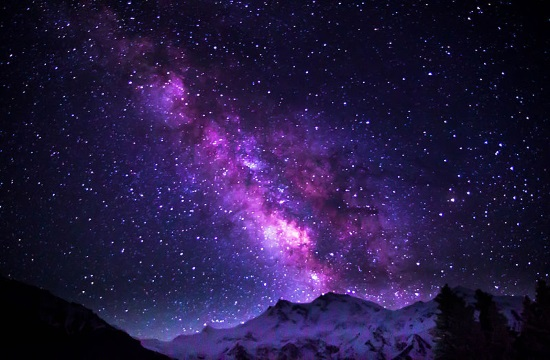

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()

import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

import plotly.tools as tls

%matplotlib inline

# Importing Libraries

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Loading Data

In [ ]:
##reading data with pandas

df_train = pd.read_csv('../input/sloan-digital-sky-survey-dr16/Skyserver_12_30_2019 4_49_58 PM.csv')


## Taking a peak at the data
df_train.head()

# EDA

In [ ]:
df_train.shape

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
df_train['class'].value_counts()

# Dropping features we will not need

In [ ]:
df_train.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 
              'fiberid'], axis = 1, inplace = True)

df_train.head(3)

In [ ]:
df_train.isnull().sum()

# Visualizing The Data

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(df_train['class'], palette = 'magma')

In [ ]:
sns.pairplot(data = df_train, palette = 'Dark2', hue = 'class')

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 5,
                                                                      figsize = (25,12))


sns.boxplot(ax = ax1, x = 'class', y = 'ra', hue = 'class', data = df_train)
sns.boxplot(ax = ax2, x = 'class', y = 'dec', hue = 'class', data = df_train)
sns.boxplot(ax = ax3, x = 'class', y = 'u', hue = 'class', data = df_train)
sns.boxplot(ax = ax4, x = 'class', y = 'g', hue = 'class', data = df_train)
sns.boxplot(ax = ax5, x = 'class', y = 'r', hue = 'class', data = df_train)
sns.boxplot(ax = ax6, x = 'class', y = 'i', hue = 'class', data = df_train)
sns.boxplot(ax = ax7, x = 'class', y = 'z', hue = 'class', data = df_train)
sns.boxplot(ax = ax8, x = 'class', y = 'redshift', hue = 'class', data = df_train)
sns.boxplot(ax = ax9, x = 'class', y = 'plate', hue = 'class', data = df_train)
sns.boxplot(ax = ax10, x = 'class', y = 'mjd', hue = 'class', data = df_train)

In [ ]:
df_train.var()

In [ ]:
corr = df_train.corr()

plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True)

# Feature Engineering

In [ ]:
labels = {'STAR' :1, 'GALAXY': 2, 'QSO': 3}

df_train.replace({'class':labels}, inplace = True)


In [ ]:
df_train.head()

In [ ]:
X = df_train.drop('class', axis = 1).values
y = df_train['class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

# Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 120)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

#  Support Vector Class.

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)

svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)


# Decision Tree Class.